In [1]:
import numpy as np

from qiskit import Aer, QuantumCircuit, transpile
from qiskit.tools.visualization import plot_histogram

simulator_backend = Aer.get_backend("aer_simulator")

In [2]:
def add_embed_layer(qc: QuantumCircuit, param: np.ndarray) -> QuantumCircuit:
  assert param.shape == (qc.num_qubits, 1)

  for i, theta in enumerate(param):
    qc.ry(*theta, i)

  qc.barrier()
  return qc

def add_pqc_layer(qc: QuantumCircuit, param: np.ndarray) -> QuantumCircuit:
  assert param.shape == (qc.num_qubits, 3)

  for i, theta in enumerate(param):
    qc.u(*theta, i)
  
  for i in range(qc.num_qubits- 1):
    qc.cz(i, i+1)

  qc.barrier()
  return qc

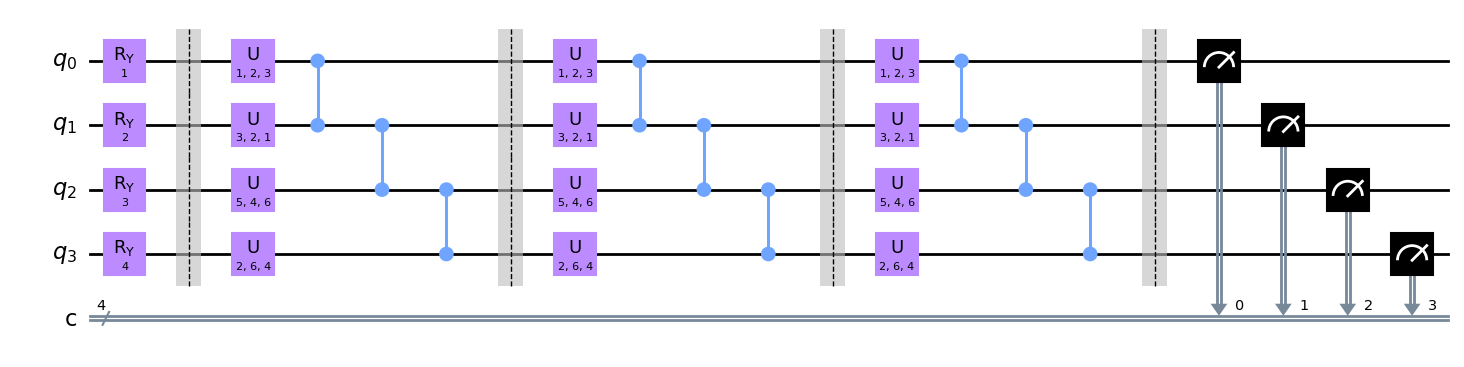

In [3]:
param_1 = np.array([[1], [2], [3], [4]])
param_3 = np.array([[1, 2, 3], [3, 2, 1], [5, 4, 6], [2, 6, 4]])

qc = QuantumCircuit(4, 4)
qc = add_embed_layer(qc, param_1)
qc = add_pqc_layer(qc, param_3)
qc = add_pqc_layer(qc, param_3)
qc = add_pqc_layer(qc, param_3)

qc.measure([0, 1, 2, 3], [0, 1, 2, 3])
qc.draw("mpl")

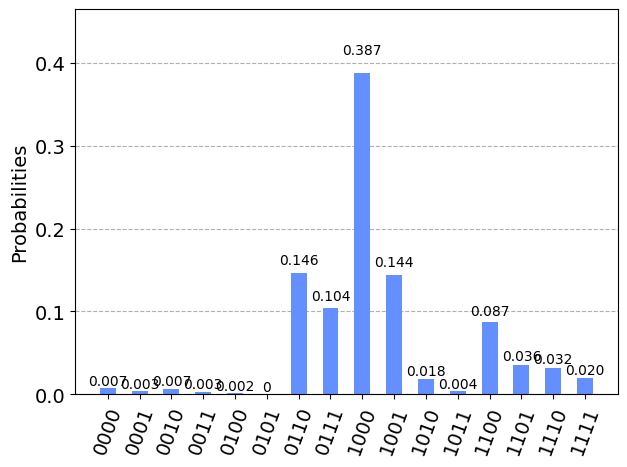

In [4]:
# Transpile for simulator
qc = transpile(qc, simulator_backend)

# Run and get count
qobj = simulator_backend.run(
  circuits=qc, 
  shots=10000,
)

# Print the counts
cnt = qobj.result().get_counts()
plot_histogram(cnt)